In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Output File (CSV)
os.makedirs(os.path.join('Genre_data'),exist_ok=True)
output_data_file = os.path.join("Genre_data")

In [4]:
# read in cleaned dataframe csv
movies = "Final_Data.csv"

Movies_df = pd.read_csv(movies)

# view cleaned dataframe and its index
print(Movies_df.columns)

Movies_df.head()

Index(['Title', 'Budget', 'Domestic_Gross', 'Year', 'Crit_Rating',
       'Aud_Rating', 'Runtime_Min', 'Genre', 'MPAA_Rating'],
      dtype='object')


,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13


In [5]:
# Need ROI for movies df

#Create a function that returns ROI
def roi(Domestic_Gross, Budget):
    
    return ((Domestic_Gross - Budget)/Budget) *100
  
# Create a variable that is the output of the function for ROI
Movies_df['ROI %'] = roi(Movies_df['Domestic_Gross'], Movies_df['Budget'])

# View the new dataframe
Movies_df.head (5)               


,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R,230.588556
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13,-44.087167
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,-81.319080
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R,-59.942103
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13,534.655220


In [6]:
#creating dataframe 2018 only
Movies2018_df = Movies_df[(Movies_df['Year']  == 2018)] 

Movies2018_df.head(5)

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
2271,INSIDIOUS: THE LAST KEY,10000000,67745330,2018,33,52.0,103.0,Horror,PG-13,577.453300
2272,PROUD MARY,30000000,20868638,2018,28,47.0,NaN,"Action & Adventure, Drama, Mystery & Suspense",R,-30.437873
2273,THE COMMUTER,40000000,36343858,2018,56,39.0,105.0,"Drama, Mystery & Suspense",PG-13,-9.140355
2274,12 STRONG,35000000,45819713,2018,51,62.0,NaN,"Action & Adventure, Drama",R,30.913466
2275,MAZE RUNNER: THE DEATH CURE,61000000,58032443,2018,43,59.0,114.0,"Action & Adventure, Drama, Science Fiction & F...",PG-13,-4.864848


In [7]:
#Create pivot table to group by genre and get AVG ROI%
Moviespivot18 = pd.pivot_table(Movies2018_df, index=['Genre'], aggfunc='mean')

#View pivot table
Moviespivot18.head ()

,Aud_Rating,Budget,Crit_Rating,Domestic_Gross,ROI %,Runtime_Min,Year
Genre,,,,,,,
Action & Adventure,44.000000,35000000.0,23.000000,3.610876e+07,3.167880,90.0,2018
"Action & Adventure, Animation, Comedy, Kids & Family",51.333333,63000000.0,55.666667,8.057236e+07,35.937105,97.5,2018
"Action & Adventure, Animation, Kids & Family",78.000000,105000000.0,92.500000,3.191860e+08,201.096616,105.0,2018
"Action & Adventure, Animation, Kids & Family, Science Fiction & Fantasy",93.000000,90000000.0,97.000000,1.901732e+08,111.303550,100.0,2018
"Action & Adventure, Comedy",65.000000,90000000.0,76.500000,2.324052e+08,147.697920,114.5,2018


In [8]:
#Create Dataframe from pivot table
Movies2018_df = Moviespivot18.reset_index()

#view new dataframe 
Movies2018_df.head (5)

,Genre,Aud_Rating,Budget,Crit_Rating,Domestic_Gross,ROI %,Runtime_Min,Year
0,Action & Adventure,44.000000,35000000.0,23.000000,3.610876e+07,3.167880,90.0,2018
1,"Action & Adventure, Animation, Comedy, Kids & ...",51.333333,63000000.0,55.666667,8.057236e+07,35.937105,97.5,2018
2,"Action & Adventure, Animation, Kids & Family",78.000000,105000000.0,92.500000,3.191860e+08,201.096616,105.0,2018
3,"Action & Adventure, Animation, Kids & Family, ...",93.000000,90000000.0,97.000000,1.901732e+08,111.303550,100.0,2018
4,"Action & Adventure, Comedy",65.000000,90000000.0,76.500000,2.324052e+08,147.697920,114.5,2018


In [9]:
#Sorted/Filter Dataframe for top 5 
Movies2018_df= Movies2018_df.nlargest(5, 'ROI %')

#view df
Movies2018_df.head ()

,Genre,Aud_Rating,Budget,Crit_Rating,Domestic_Gross,ROI %,Runtime_Min,Year
29,"Drama, Kids & Family",91.000000,7.000000e+06,61.0,83482352.0,1092.605029,110.0,2018
28,"Drama, Horror, Mystery & Suspense",83.000000,1.700000e+07,95.0,188024361.0,1006.025653,90.0,2018
32,"Drama, Mystery & Suspense, Science Fiction & F...",32.000000,3.500000e+06,14.0,25091816.0,616.909029,NaN,2018
34,Horror,39.857143,1.078571e+07,40.0,68589991.0,519.356774,101.2,2018
30,"Drama, Musical & Performing Arts, Romance",80.000000,3.500000e+06,24.0,16376066.0,367.887600,104.0,2018


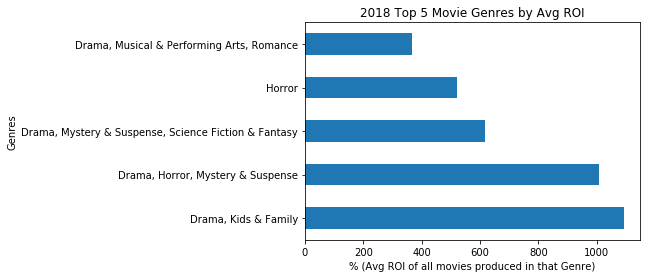

In [10]:
#Create bar graph to visualize df
Movies2018_df.plot(kind='barh', x = 'Genre', y= 'ROI %', legend =None)

plt.title('2018 Top 5 Movie Genres by Avg ROI')
plt.ylabel('Genres')
plt.xlabel ('% (Avg ROI of all movies produced in that Genre)')



plt.savefig(os.path.join('Genre_Aoutput',f'2018top5genresROI.png'))

## 2018-2014 build for roi avg last 5 years

In [11]:
Movies_df.head ()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R,230.588556
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13,-44.087167
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,-81.319080
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R,-59.942103
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13,534.655220


In [15]:
#creating dataframe 2018-2014 only
Movieslast5years_df = Movies_df[(Movies_df['Year']  > 2013)] 

Movieslast5years_df.head(5)

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
1816,PARANORMAL ACTIVITY: THE MARKED ONES,5000000,32462372,2014,39,34.0,84.0,Horror,R,549.247440
1817,THE LEGEND OF HERCULES,70000000,18848538,2014,3,33.0,99.0,"Action & Adventure, Science Fiction & Fantasy",PG-13,-73.073517
1818,RIDE ALONG,25000000,134202565,2014,18,58.0,99.0,"Action & Adventure, Comedy",PG-13,436.810260
1819,THE NUT JOB,30000000,64251538,2014,12,43.0,86.0,"Animation, Comedy",PG,114.171793
1820,JACK RYAN: SHADOW RECRUIT,60000000,50577412,2014,55,53.0,105.0,"Action & Adventure, Drama, Mystery & Suspense",PG-13,-15.704313


In [31]:
#Create pivot table to group by genre and get AVG ROI%
Moviespivotlast5yearsbygenre = pd.pivot_table(Movieslast5years_df, index=['Genre'], aggfunc='mean')

#View pivot table
Moviespivotlast5yearsbygenre.head ()

,Aud_Rating,Budget,Crit_Rating,Domestic_Gross,ROI %,Runtime_Min,Year
Genre,,,,,,,
Action & Adventure,50.650000,80650000.0,34.600000,8.049816e+07,19.554161,110.900000,2015.050000
"Action & Adventure, Animation, Comedy",57.000000,84000000.0,53.000000,1.791654e+08,61.151913,97.000000,2016.000000
"Action & Adventure, Animation, Comedy, Kids & Family",67.000000,92500000.0,70.300000,1.219701e+08,60.898870,95.888889,2016.500000
"Action & Adventure, Animation, Comedy, Kids & Family, Science Fiction & Fantasy",63.500000,95000000.0,63.500000,1.141174e+08,10.594232,95.000000,2014.500000
"Action & Adventure, Animation, Kids & Family",81.666667,120000000.0,93.666667,2.957097e+08,156.010420,104.333333,2017.333333


In [32]:
#Create Dataframe from pivot table
MoviesL5yrs_df = Moviespivotlast5yearsbygenre.reset_index()

#view new dataframe 
MoviesL5yrs_df.head ()

,Genre,Aud_Rating,Budget,Crit_Rating,Domestic_Gross,ROI %,Runtime_Min,Year
0,Action & Adventure,50.650000,80650000.0,34.600000,8.049816e+07,19.554161,110.900000,2015.050000
1,"Action & Adventure, Animation, Comedy",57.000000,84000000.0,53.000000,1.791654e+08,61.151913,97.000000,2016.000000
2,"Action & Adventure, Animation, Comedy, Kids & ...",67.000000,92500000.0,70.300000,1.219701e+08,60.898870,95.888889,2016.500000
3,"Action & Adventure, Animation, Comedy, Kids & ...",63.500000,95000000.0,63.500000,1.141174e+08,10.594232,95.000000,2014.500000
4,"Action & Adventure, Animation, Kids & Family",81.666667,120000000.0,93.666667,2.957097e+08,156.010420,104.333333,2017.333333


In [33]:
#Sorted/Filter Dataframe for top 5 
MoviesL5yrs_df= MoviesL5yrs_df.nlargest(5, 'ROI %')

#view df
MoviesL5yrs_df.head ()

,Genre,Aud_Rating,Budget,Crit_Rating,Domestic_Gross,ROI %,Runtime_Min,Year
73,"Horror, Mystery & Suspense",49.625000,5.762500e+06,57.500000,5.897737e+07,3994.556035,93.142857,2016.000000
59,"Drama, Horror, Mystery & Suspense",74.000000,2.175000e+07,81.750000,1.678619e+08,1115.963209,114.000000,2017.250000
23,"Action & Adventure, Horror, Mystery & Suspense",37.333333,6.666667e+06,37.666667,4.668842e+07,570.293667,90.000000,2015.666667
51,"Comedy, Musical & Performing Arts",64.000000,2.900000e+07,66.000000,1.842962e+08,535.504241,114.000000,2015.000000
71,Horror,41.481481,1.229259e+07,44.037037,4.677825e+07,431.240898,97.125000,2016.037037


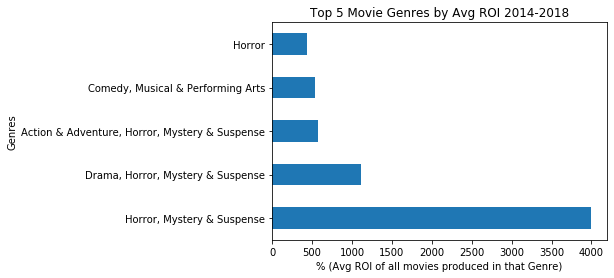

In [34]:
#Create bar graph to visualize df
MoviesL5yrs_df.plot(kind='barh', x = 'Genre', y= 'ROI %', legend =None)

plt.title('Top 5 Movie Genres by Avg ROI 2014-2018')
plt.ylabel('Genres')
plt.xlabel ('% (Avg ROI of all movies produced in that Genre)')



plt.savefig(os.path.join('Genre_Aoutput',f'L5yrstop5genresROI.png'))

## line graph for by years for top 5 genres

In [41]:
print(Movieslast5years_df.columns)

Movieslast5years_df.head ()

Index(['Title', 'Budget', 'Domestic_Gross', 'Year', 'Crit_Rating',
       'Aud_Rating', 'Runtime_Min', 'Genre', 'MPAA_Rating', 'ROI %'],
      dtype='object')


,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
1816,PARANORMAL ACTIVITY: THE MARKED ONES,5000000,32462372,2014,39,34.0,84.0,Horror,R,549.247440
1817,THE LEGEND OF HERCULES,70000000,18848538,2014,3,33.0,99.0,"Action & Adventure, Science Fiction & Fantasy",PG-13,-73.073517
1818,RIDE ALONG,25000000,134202565,2014,18,58.0,99.0,"Action & Adventure, Comedy",PG-13,436.810260
1819,THE NUT JOB,30000000,64251538,2014,12,43.0,86.0,"Animation, Comedy",PG,114.171793
1820,JACK RYAN: SHADOW RECRUIT,60000000,50577412,2014,55,53.0,105.0,"Action & Adventure, Drama, Mystery & Suspense",PG-13,-15.704313


In [69]:
MoviesGerebyYrpivotROI= Movieslast5years_df.pivot_table(index=['Year'], columns=['Genre'], aggfunc='mean', values=['ROI %'])

MoviesGerebyYrpivotROI.head ()

ROI %                                        \
Genre Action & Adventure Action & Adventure, Animation, Comedy   
Year                                                             
2014           73.148830                                   NaN   
2015           -3.469511                                   NaN   
2016           20.111939                             61.151913   
2017                 NaN                                   NaN   
2018            3.167880                                   NaN   

                                                            \
Genre Action & Adventure, Animation, Comedy, Kids & Family   
Year                                                         
2014                                          153.271091     
2015                                          -33.824129     
2016                                                 NaN     
2017                                           57.114832     
2018                                           35.937105     

                                                                                       \
Genre Action & Adventure, Animation, Comedy, Kids & Family, Science Fiction & Fantasy   
Year                                                                                    
2014                                          -15.271158                                
2015                                           36.459623                                
2016                                                 NaN                                
2017                                                 NaN                                
2018                                                 NaN                                

                                                    \
Genre Action & Adventure, Animation, Kids & Family   
Year                                                 
2014                                           NaN   
2015                                           NaN   
2016                                     65.838029   
2017                                           NaN   
2018                                    201.096616   

                                                                               \
Genre Action & Adventure, Animation, Kids & Family, Science Fiction & Fantasy   
Year                                                                            
2014                                           22.070982                        
2015                                                 NaN                        
2016                                                 NaN                        
2017                                                 NaN                        
2018                                          111.303550                        

                                                                \
Genre Action & Adventure, Animation, Science Fiction & Fantasy   
Year                                                             
2014                                                 NaN         
2015                                                 NaN         
2016                                          -12.685295         
2017                                                 NaN         
2018                                                 NaN         

                                                                    \
Genre Action & Adventure, Comedy Action & Adventure, Comedy, Drama   
Year                                                                 
2014                  273.974461                               NaN   
2015                   -0.500566                        268.742425   
2016                  106.439158                               NaN   
2017                   38.633382                        -25.599392   
2018                  147.697920                               NaN   

                                                 ...                \
Genre Action & Adventure, Comedy, Kids

In [49]:
#Create Dataframe from pivot table
MoviesL5yrsbygenre_df = MoviesGerebyYrpivotROI.reset_index()

#view new dataframe 
MoviesL5yrsbygenre_df.head ()

Year              ROI %                                        \
Genre       Action & Adventure Action & Adventure, Animation, Comedy   
0      2014          73.148830                                   NaN   
1      2015          -3.469511                                   NaN   
2      2016          20.111939                             61.151913   
3      2017                NaN                                   NaN   
4      2018           3.167880                                   NaN   

                                                            \
Genre Action & Adventure, Animation, Comedy, Kids & Family   
0                                             153.271091     
1                                             -33.824129     
2                                                    NaN     
3                                              57.114832     
4                                              35.937105     

                                                                                       \
Genre Action & Adventure, Animation, Comedy, Kids & Family, Science Fiction & Fantasy   
0                                             -15.271158                                
1                                              36.459623                                
2                                                    NaN                                
3                                                    NaN                                
4                                                    NaN                                

                                                    \
Genre Action & Adventure, Animation, Kids & Family   
0                                              NaN   
1                                              NaN   
2                                        65.838029   
3                                              NaN   
4                                       201.096616   

                                                                               \
Genre Action & Adventure, Animation, Kids & Family, Science Fiction & Fantasy   
0                                              22.070982                        
1                                                    NaN                        
2                                                    NaN                        
3                                                    NaN                        
4                                             111.303550                        

                                                                \
Genre Action & Adventure, Animation, Science Fiction & Fantasy   
0                                                    NaN         
1                                                    NaN         
2                                             -12.685295         
3                                                    NaN         
4                                                    NaN         

                                                                    ...  \
Genre Action & Adventure, Comedy Action & Adventure, Comedy, Drama  ...   
0                     273.974461                               NaN  ...   
1                      -0.500566                        268.742425  ...   
2                     106.439158                               NaN  ...   
3                      38.633382                        -25.599392  ...   
4                     147.697920                               NaN  ...   

                                                              \
Genre Kids & Family Kids & Family, Musical & Performing Arts   
0               NaN                               128.575664   
1               NaN                                      NaN   
2         17.281771                                      NaN   
3               NaN                                      NaN   
4               NaN                                      NaN   

                                                \
Genre Ki

In [80]:

#Horror, Mystery & Suspense
#Horror
#Comedy, Musical & Performing Arts
#Action & Adventure, Horror, Mystery & Suspense
#Drama, Horror, Mystery & Suspense

In [103]:
top5moviesG = MoviesL5yrsbygenre_df.loc[:,MoviesL5yrsbygenre_df.columns.get_level_values("Genre").isin({"Horror","Comedy, Musical & Performing Arts","Horror, Mystery & Supense","Action & Adventure, Horror, Mystery & Supense", "Drama, Horror, Mystery & Suspense"})]

top5moviesG

ROI %                                    \
Genre Comedy, Musical & Performing Arts Drama, Horror, Mystery & Suspense   
0                                   NaN                               NaN   
1                            535.504241                               NaN   
2                                   NaN                               NaN   
3                                   NaN                       1152.609061   
4                                   NaN                       1006.025653   

                   
Genre      Horror  
0      641.731989  
1      238.645791  
2      459.282079  
3      411.834045  
4      519.356774

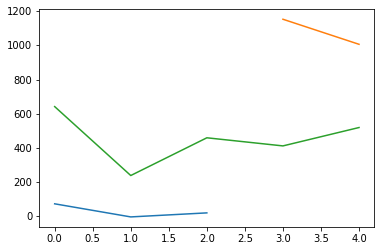

In [99]:
plt.plot(top5moviesG)




